In [18]:
#Libraries we will be using
import pandas as pd
import requests
import json
import datetime
import numpy as np
import yfinance as yf

In [10]:
# Set the API endpoint and parameters
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range?vs_currency=usd&from=1712448000&to=1712534400"

#1712448000 : Apr 7 2024 00:00:00 GMT+0000
#1681776000 : Apr 8 2024 00:00:00 GMT+0000

# Send a GET request to the API endpoint
response = requests.get(url)
data = json.loads(response.text)

In [11]:
# Extract the price data from the response
prices = data['prices']

# Convert the price data to a Pandas dataframe
df = pd.DataFrame(prices, columns=['timestamp', 'price'])
df = df[['timestamp', 'price']].rename(columns = {'price': 'Coingecko BTC','timestamp':'Timestamp'})

# Convert the timestamp to a datetime object
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')
print(df)

                 Timestamp  Coingecko BTC
0  2024-04-07 00:08:13.724   68988.340021
1  2024-04-07 01:03:35.571   68981.901791
2  2024-04-07 02:03:24.976   69597.266955
3  2024-04-07 03:05:14.432   69310.402559
4  2024-04-07 04:06:47.656   69486.990552
5  2024-04-07 05:02:36.353   69336.548551
6  2024-04-07 06:04:29.617   69414.781185
7  2024-04-07 07:01:08.036   69221.640929
8  2024-04-07 08:08:11.731   69477.083519
9  2024-04-07 09:01:54.615   69531.038831
10 2024-04-07 10:08:57.265   69263.747379
11 2024-04-07 11:11:35.416   69371.377849
12 2024-04-07 12:05:33.376   69375.498854
13 2024-04-07 13:03:49.498   69354.460467
14 2024-04-07 14:08:04.076   69345.415524
15 2024-04-07 15:09:45.700   69582.016161
16 2024-04-07 16:06:30.981   69531.067027
17 2024-04-07 17:05:52.272   70046.164634
18 2024-04-07 18:01:12.070   69789.787229
19 2024-04-07 19:00:40.459   69411.321275
20 2024-04-07 20:00:35.744   69225.052284
21 2024-04-07 21:09:26.422   69326.579699
22 2024-04-07 22:02:24.685   69041

In [6]:

# #Simple manipulation of the Timestamp column to have a linear 5 mins interval.

# start_time = pd.to_datetime('2023-04-17 00:00:00')
# end_time = pd.to_datetime('2023-04-17 23:55:00')

# interval = '5min'
# new_index = pd.date_range(start=start_time, end=end_time, freq=interval)

# df['Timestamp'] = new_index
# print(df)

In [12]:
btc = yf.Ticker("BTC-USD")
start = "2024-04-07"
end = "2024-04-08"
interval = "5m"

df1 = btc.history(start=start, end=end, interval=interval)
df1 = df1[['Close']]
df1 = df1[['Close']].rename(columns = {'Close': 'YFinance BTC'})
df1.index = pd.to_datetime(df1.index, utc=True).tz_localize(None)
df1 = df1.reset_index()
print(df1)

               Datetime  YFinance BTC
0   2024-04-07 00:00:00  68964.250000
1   2024-04-07 00:05:00  68980.382812
2   2024-04-07 00:10:00  69083.445312
3   2024-04-07 00:15:00  69131.585938
4   2024-04-07 00:20:00  69063.601562
..                  ...           ...
283 2024-04-07 23:35:00  69394.734375
284 2024-04-07 23:40:00  69379.421875
285 2024-04-07 23:45:00  69450.789062
286 2024-04-07 23:50:00  69397.093750
287 2024-04-07 23:55:00  69374.898438

[288 rows x 2 columns]


In [13]:
df2 = df.join(df1['YFinance BTC'])
print(df2)

                 Timestamp  Coingecko BTC  YFinance BTC
0  2024-04-07 00:08:13.724   68988.340021  68964.250000
1  2024-04-07 01:03:35.571   68981.901791  68980.382812
2  2024-04-07 02:03:24.976   69597.266955  69083.445312
3  2024-04-07 03:05:14.432   69310.402559  69131.585938
4  2024-04-07 04:06:47.656   69486.990552  69063.601562
5  2024-04-07 05:02:36.353   69336.548551  68881.382812
6  2024-04-07 06:04:29.617   69414.781185  69016.445312
7  2024-04-07 07:01:08.036   69221.640929  69029.804688
8  2024-04-07 08:08:11.731   69477.083519  69077.781250
9  2024-04-07 09:01:54.615   69531.038831  69056.593750
10 2024-04-07 10:08:57.265   69263.747379  69022.992188
11 2024-04-07 11:11:35.416   69371.377849  69015.179688
12 2024-04-07 12:05:33.376   69375.498854  69067.468750
13 2024-04-07 13:03:49.498   69354.460467  69310.296875
14 2024-04-07 14:08:04.076   69345.415524  69239.757812
15 2024-04-07 15:09:45.700   69582.016161  69275.539062
16 2024-04-07 16:06:30.981   69531.067027  69531

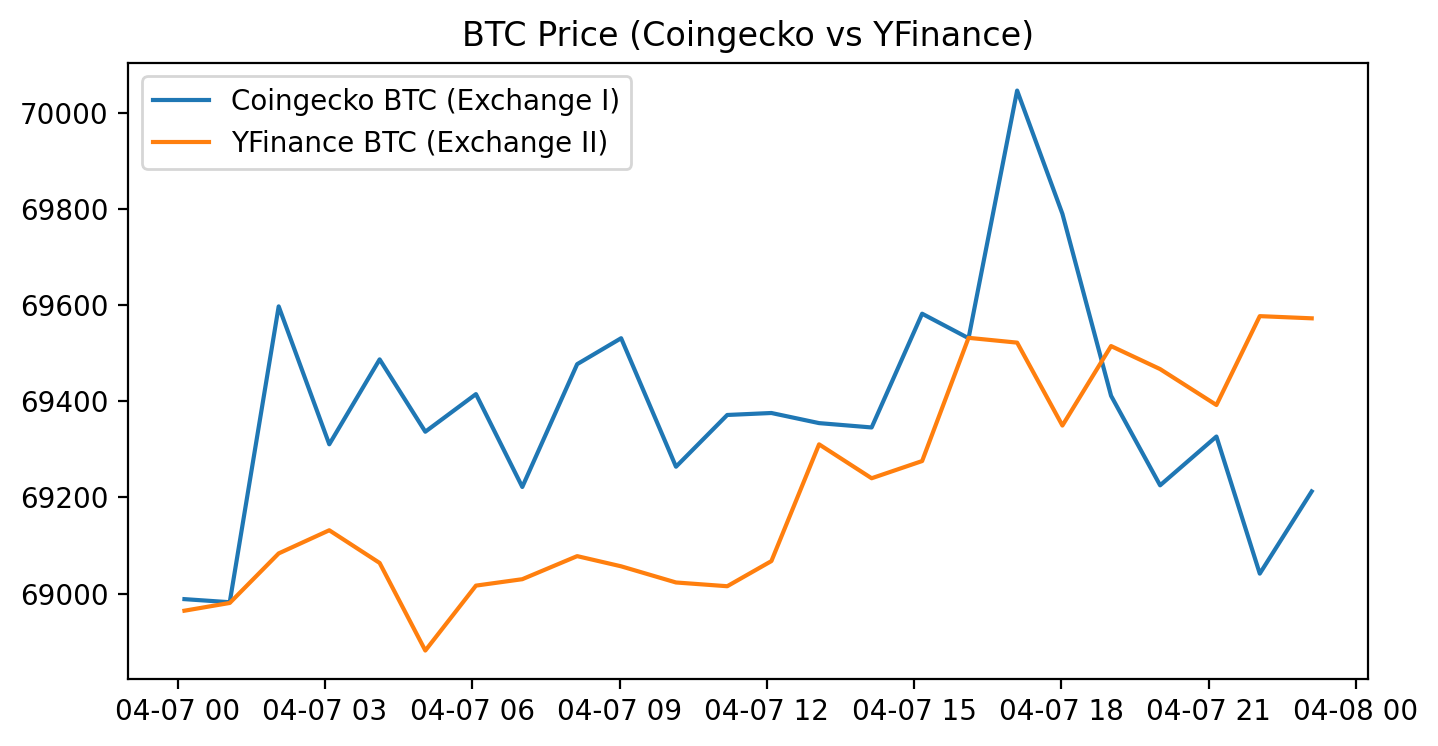

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, ax = plt.subplots(figsize=(8,4),dpi=200)
ax.plot(df2['Timestamp'], df2['Coingecko BTC'], label='Coingecko BTC (Exchange I)')
ax.plot(df2['Timestamp'], df2['YFinance BTC'], label='YFinance BTC (Exchange II)')
plt.title('BTC Price (Coingecko vs YFinance)')
plt.legend()

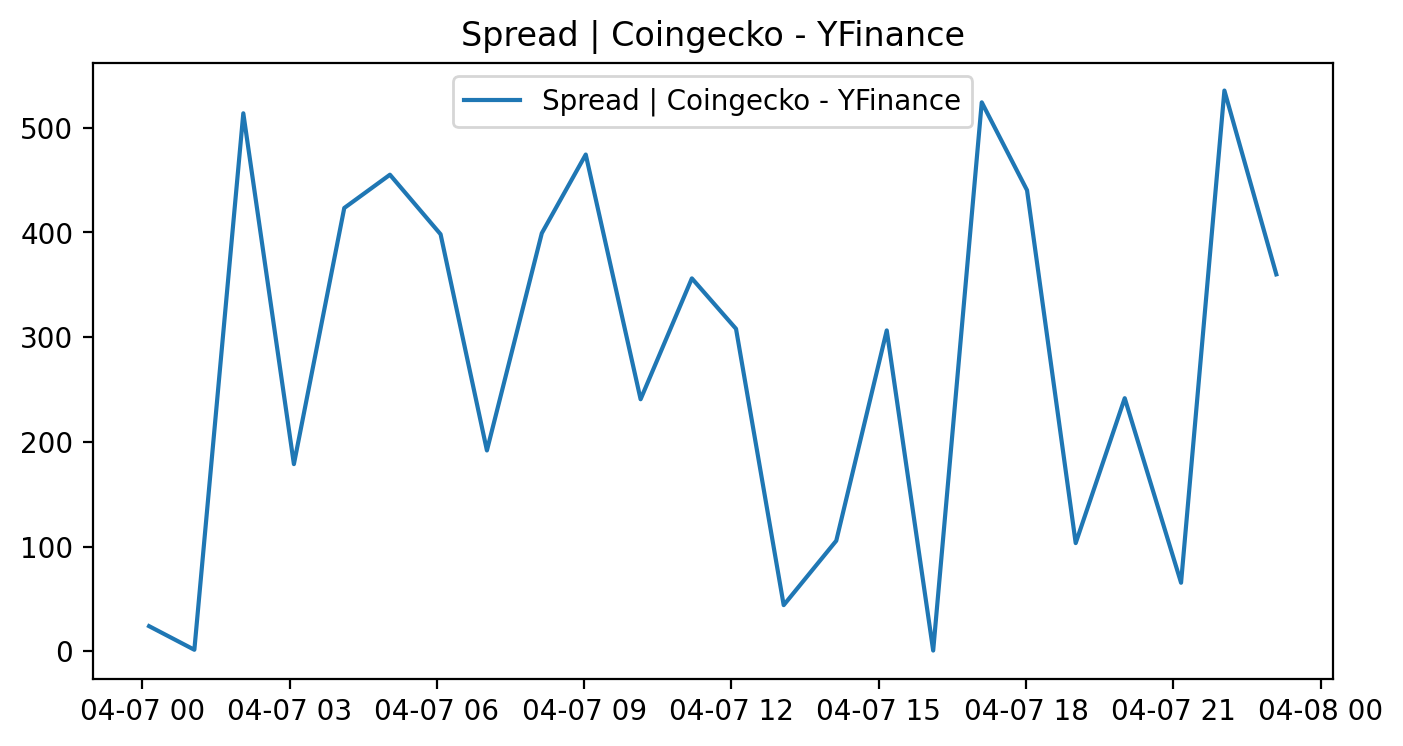

In [15]:
fig, ax = plt.subplots(figsize=(8,4),dpi=200)
plt.plot(df2['Timestamp'], abs(df2['Coingecko BTC'] - df2['YFinance BTC']), label = 'Spread | Coingecko - YFinance')
plt.title('Spread | Coingecko - YFinance')
plt.legend()

In [19]:
#Buying low on 1 exchange and selling high on the other exchange
#Let's combine the necessary columns together applying a 0.2% average trading cost between the maker and taker

comb_df = pd.concat([df2['Timestamp'],
                    df2['Coingecko BTC'],
                    df2['YFinance BTC'],
                    abs(df2['Coingecko BTC']-df2['YFinance BTC']),
                    0.002 * (df2['Coingecko BTC']+df2['YFinance BTC'])], axis =1)
comb_df.columns = ['Timestamp','Coingecko BTC', 'YFinance BTC', 'Absolute Difference', 'Trading Cost']
comb_df

,Timestamp,Coingecko BTC,YFinance BTC,Absolute Difference,Trading Cost
0,2024-04-07 00:08:13.724,68988.340021,68964.250000,24.090021,275.905180
1,2024-04-07 01:03:35.571,68981.901791,68980.382812,1.518978,275.924569
2,2024-04-07 02:03:24.976,69597.266955,69083.445312,513.821643,277.361425
3,2024-04-07 03:05:14.432,69310.402559,69131.585938,178.816621,276.883977
4,2024-04-07 04:06:47.656,69486.990552,69063.601562,423.388990,277.101184
5,2024-04-07 05:02:36.353,69336.548551,68881.382812,455.165738,276.435863
6,2024-04-07 06:04:29.617,69414.781185,69016.445312,398.335873,276.862453
7,2024-04-07 07:01:08.036,69221.640929,69029.804688,191.836241,276.502891
8,2024-04-07 08:08:11.731,69477.083519,69077.781250,399.302269,277.109730
9,2024-04-07 09:01:54.615,69531.038831,69056.593750,474.445081,277.175265


In [20]:
#Checking out which accounts in the corresponding exchanges need to be bought or sold
#Will return 0 if Coingecko BTC Price > YFinance BTC Price (buy on Coingecko and sell on YFinance)
#Will return 1 if YFinance BTC Price > Coingecko BTC Price (buy on YFinance and sell on Coingecko)

v = pd.DataFrame(np.where(comb_df['Coingecko BTC']>comb_df['YFinance BTC'], 0, 1))
v.columns = ['BuyCoinSellYFin']
comb_df = pd.concat([comb_df,v],axis = 1)
comb_df

,Timestamp,Coingecko BTC,YFinance BTC,Absolute Difference,Trading Cost,BuyCoinSellYFin
0,2024-04-07 00:08:13.724,68988.340021,68964.250000,24.090021,275.905180,0
1,2024-04-07 01:03:35.571,68981.901791,68980.382812,1.518978,275.924569,0
2,2024-04-07 02:03:24.976,69597.266955,69083.445312,513.821643,277.361425,0
3,2024-04-07 03:05:14.432,69310.402559,69131.585938,178.816621,276.883977,0
4,2024-04-07 04:06:47.656,69486.990552,69063.601562,423.388990,277.101184,0
5,2024-04-07 05:02:36.353,69336.548551,68881.382812,455.165738,276.435863,0
6,2024-04-07 06:04:29.617,69414.781185,69016.445312,398.335873,276.862453,0
7,2024-04-07 07:01:08.036,69221.640929,69029.804688,191.836241,276.502891,0
8,2024-04-07 08:08:11.731,69477.083519,69077.781250,399.302269,277.109730,0
9,2024-04-07 09:01:54.615,69531.038831,69056.593750,474.445081,277.175265,0


In [21]:
#Execute Trade for Profit

order69 = pd.DataFrame(np.where(comb_df['Absolute Difference']>comb_df['Trading Cost'], 0, 1))
order69.columns = ['Execute']
comb_df = pd.concat([comb_df,order69],axis = 1)
comb_df

,Timestamp,Coingecko BTC,YFinance BTC,Absolute Difference,Trading Cost,BuyCoinSellYFin,Execute
0,2024-04-07 00:08:13.724,68988.340021,68964.250000,24.090021,275.905180,0,1
1,2024-04-07 01:03:35.571,68981.901791,68980.382812,1.518978,275.924569,0,1
2,2024-04-07 02:03:24.976,69597.266955,69083.445312,513.821643,277.361425,0,0
3,2024-04-07 03:05:14.432,69310.402559,69131.585938,178.816621,276.883977,0,1
4,2024-04-07 04:06:47.656,69486.990552,69063.601562,423.388990,277.101184,0,0
5,2024-04-07 05:02:36.353,69336.548551,68881.382812,455.165738,276.435863,0,0
6,2024-04-07 06:04:29.617,69414.781185,69016.445312,398.335873,276.862453,0,0
7,2024-04-07 07:01:08.036,69221.640929,69029.804688,191.836241,276.502891,0,1
8,2024-04-07 08:08:11.731,69477.083519,69077.781250,399.302269,277.109730,0,0
9,2024-04-07 09:01:54.615,69531.038831,69056.593750,474.445081,277.175265,0,0


In [22]:
#Let's get a tally on all the orders that would have been executed and be profitable
orders_fulfilled = comb_df.loc[comb_df['Execute']==0]
orders_fulfilled

,Timestamp,Coingecko BTC,YFinance BTC,Absolute Difference,Trading Cost,BuyCoinSellYFin,Execute
2,2024-04-07 02:03:24.976,69597.266955,69083.445312,513.821643,277.361425,0,0
4,2024-04-07 04:06:47.656,69486.990552,69063.601562,423.388990,277.101184,0,0
5,2024-04-07 05:02:36.353,69336.548551,68881.382812,455.165738,276.435863,0,0
6,2024-04-07 06:04:29.617,69414.781185,69016.445312,398.335873,276.862453,0,0
8,2024-04-07 08:08:11.731,69477.083519,69077.781250,399.302269,277.109730,0,0
9,2024-04-07 09:01:54.615,69531.038831,69056.593750,474.445081,277.175265,0,0
11,2024-04-07 11:11:35.416,69371.377849,69015.179688,356.198162,276.773115,0,0
12,2024-04-07 12:05:33.376,69375.498854,69067.468750,308.030104,276.885935,0,0
15,2024-04-07 15:09:45.700,69582.016161,69275.539062,306.477099,277.715110,0,0
17,2024-04-07 17:05:52.272,70046.164634,69521.867188,524.297447,279.136064,0,0


In [23]:
total_profits = sum(orders_fulfilled['Absolute Difference']-orders_fulfilled['Trading Cost'])
total_profits

1889.7432002414407